#### single-label, multiclass classification
when everything can be categorized as only one label

#### multilabel, multiclass classification
when things can be classified as more than one thing

#### What is done in this notebook
Clasification of a newswire(wiadomosc), with its topic
46 different topics, at least 10 examples for each

In [75]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)
print("Length of train_data:", len(train_data)) #8982
print("Length of test_data:", len(test_data))   #2246

Length of train_data: 8982
Length of test_data: 2246


In [76]:
# getting text back

word_index_dict = reuters.get_word_index()
index_word_dict = dict([value, key] for (key,value) in word_index_dict.items())

def newswire_decoder(news):
    decoded_newswire = ' '.join(index_word_dict.get(i-3, '?') for i in news)
    return decoded_newswire


In [77]:
# what each label means

label_meaning = ['cocoa','grain','veg-oil','earn','acq','wheat','copper','housing','money-supply','coffee','sugar','trade','reserves','ship','cotton','carcass','crude','nat-gas',
                'cpi','money-fx','interest','gnp','meal-feed','alum','oilseed','gold','tin','strategic-metal','livestock','retail','ipi','iron-steel','rubber','heat','jobs',
                'lei','bop','zinc','orange','pet-chem','dlr','gas','silver','wpi','hog','lead']

index_label = dict([k,v] for k, v in enumerate(label_meaning))

In [78]:
#preparing the data

import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)


def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

#one_hot_train_labels = to_one_hot(train_labels)
#one_hot_test_labels = to_one_hot(test_labels)

# this does the same thing
from keras.utils.np_utils import to_categorical
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)



In [51]:
# building the model

from keras import models
from keras import layers

# 64 intermediate layers because, doing less than that can cut some information because there is 46 output categories
# in 3.4 16 was used bc there was only 2 outputs
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax')) #46 - number of categories, softmax gives probability that output[i] is correct

# cat_crossentropy is best in this example, 
# It measures the distance between two probability distributions, output distribution and true label distribution
model.compile(optimizer='rmsprop', loss='categorical_crossentropy',metrics=['accuracy'])

In [79]:
# for validation
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [52]:
# training the model
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data = (x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 23ms/step - loss: 2.6627 - accuracy: 0.5447 - val_loss: 1.7748 - val_accuracy: 0.6270
Epoch 2/20
16/16 [==============================] - 0s 13ms/step - loss: 1.4371 - accuracy: 0.7026 - val_loss: 1.3151 - val_accuracy: 0.7110
Epoch 3/20
16/16 [==============================] - 0s 11ms/step - loss: 1.0609 - accuracy: 0.7754 - val_loss: 1.1320 - val_accuracy: 0.7600
Epoch 4/20
16/16 [==============================] - 0s 11ms/step - loss: 0.8340 - accuracy: 0.8287 - val_loss: 1.0423 - val_accuracy: 0.7840
Epoch 5/20
16/16 [==============================] - 0s 11ms/step - loss: 0.6668 - accuracy: 0.8627 - val_loss: 0.9745 - val_accuracy: 0.7860
Epoch 6/20
16/16 [==============================] - 0s 12ms/step - loss: 0.5310 - accuracy: 0.8908 - val_loss: 0.9298 - val_accuracy: 0.8020
Epoch 7/20
16/16 [==============================] - 0s 11ms/step - loss: 0.4285 - accuracy: 0.9108 - val_loss: 0.8907 - val_accuracy: 0.8110
Epoch 8/20
16

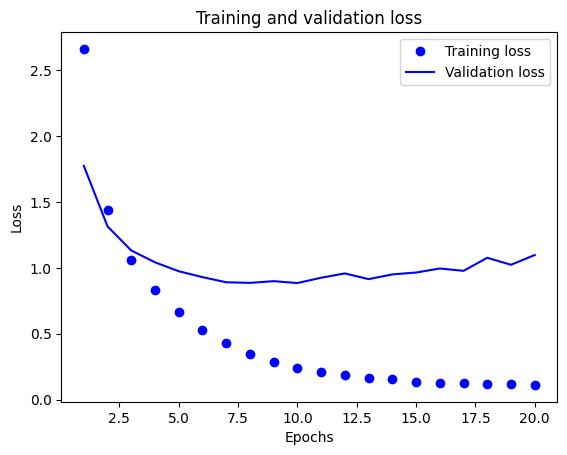

<Figure size 640x480 with 0 Axes>

In [53]:
#showing the loss

import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()

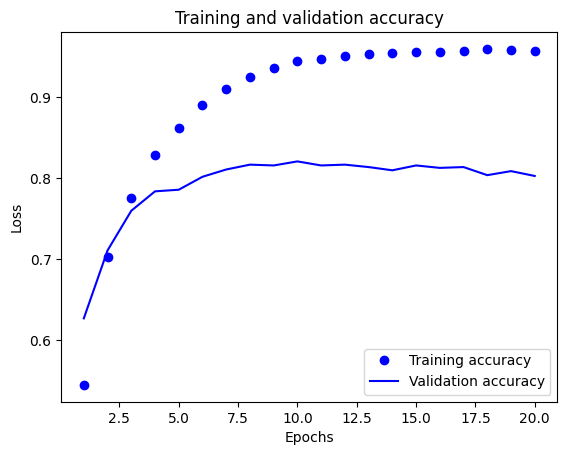

In [54]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### Results
We can see that the model starts overfitting after around 9 epochs, so lets train it for 9 epochs again

In [56]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(partial_x_train,partial_y_train,epochs=9,batch_size=512,validation_data=(x_val, y_val))

results = model.evaluate(x_test, one_hot_test_labels) #about 80% accuracy
print(results)

Epoch 1/9
16/16 [==============================] - 1s 22ms/step - loss: 2.5704 - accuracy: 0.5241 - val_loss: 1.7485 - val_accuracy: 0.6360
Epoch 2/9
16/16 [==============================] - 0s 12ms/step - loss: 1.4268 - accuracy: 0.7016 - val_loss: 1.3144 - val_accuracy: 0.7050
Epoch 3/9
16/16 [==============================] - 0s 11ms/step - loss: 1.0675 - accuracy: 0.7705 - val_loss: 1.1413 - val_accuracy: 0.7460
Epoch 4/9
16/16 [==============================] - 0s 12ms/step - loss: 0.8409 - accuracy: 0.8234 - val_loss: 1.0281 - val_accuracy: 0.7900
Epoch 5/9
16/16 [==============================] - 0s 11ms/step - loss: 0.6650 - accuracy: 0.8597 - val_loss: 0.9637 - val_accuracy: 0.8120
Epoch 6/9
16/16 [==============================] - 0s 11ms/step - loss: 0.5281 - accuracy: 0.8899 - val_loss: 0.9296 - val_accuracy: 0.8160
Epoch 7/9
16/16 [==============================] - 0s 11ms/step - loss: 0.4242 - accuracy: 0.9136 - val_loss: 0.8913 - val_accuracy: 0.8160
Epoch 8/9
16/16 [===

In [80]:
def accuracy_plot(history):
    plt.clf()
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    plt.plot(epochs, acc, 'bo', label='Training accuracy')
    plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

Epoch 1/20
32/32 [==============================] - 1s 12ms/step - loss: 2.2286 - accuracy: 0.6016 - val_loss: 1.4985 - val_accuracy: 0.6950
Epoch 2/20
32/32 [==============================] - 0s 8ms/step - loss: 1.1728 - accuracy: 0.7598 - val_loss: 1.1229 - val_accuracy: 0.7660
Epoch 3/20
32/32 [==============================] - 0s 8ms/step - loss: 0.8293 - accuracy: 0.8289 - val_loss: 0.9638 - val_accuracy: 0.8000
Epoch 4/20
32/32 [==============================] - 0s 7ms/step - loss: 0.6188 - accuracy: 0.8760 - val_loss: 0.8910 - val_accuracy: 0.8080
Epoch 5/20
32/32 [==============================] - 0s 7ms/step - loss: 0.4733 - accuracy: 0.9032 - val_loss: 0.8392 - val_accuracy: 0.8310
Epoch 6/20
32/32 [==============================] - 0s 7ms/step - loss: 0.3705 - accuracy: 0.9242 - val_loss: 0.8225 - val_accuracy: 0.8320
Epoch 7/20
32/32 [==============================] - 0s 7ms/step - loss: 0.2985 - accuracy: 0.9369 - val_loss: 0.7994 - val_accuracy: 0.8310
Epoch 8/20
32/32 [=

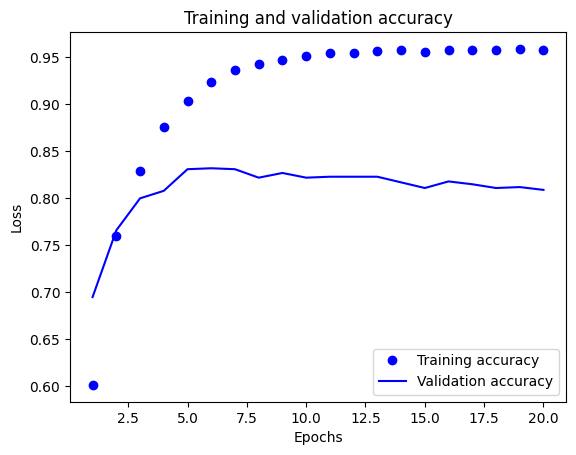

71/71 [==============================] - 0s 3ms/step - loss: 1.1952 - accuracy: 0.7872
[1.1951972246170044, 0.7871772050857544]


In [90]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
#model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=256, validation_data = (x_val, y_val))
accuracy_plot(history)

results = model.evaluate(x_test, one_hot_test_labels)
print(results)